In [66]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import os

import math
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [67]:
cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in 'C:\\Users\\lenaw\\Documents\\work': ['.ipynb_checkpoints', '.Rhistory', 'auswertung_bv.Rmd', 'code', 'dashboard_BV.R', 'data_op_ms', 'data_op_ms.csv', 'data_op_ms.xlsx', 'finance_R.docx', 'finance_R.Rmd', 'Kundenzufriedenheit', 'mayerhofer.Rmd', 'may_df.xlsx', 'may_df_c.csv', 'MA_Ueberwachung_R_Code.zip', 'Mitarbieterueberwachung', 'MSF Datenreihe.xlsx', 'Notizen Führen auf Distanz.docx', 'smime.p7s', 'stock.ipynb', 'Untitled.ipynb', 'Webinar', 'Zugang BV.docx']


In [121]:
# Daten von Yahoo 
# Mayerhofer Strategie AMI P (a)
df = web.DataReader('0P0000US1T.F', data_source='yahoo', start='2017-01-01', end='2019-12-01')
df_apple = web.DataReader ('AAPL', data_source='yahoo', start='2012-01-01', end='2020-12-17')

# Apple Daten
df_apple

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.650659
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.718646
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.859850
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.994284
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.973674
...,...,...,...,...,...,...
2020-12-11,122.760002,120.550003,122.430000,122.410004,86939800.0,122.227356
2020-12-14,123.349998,121.540001,122.599998,121.779999,79184500.0,121.598289
2020-12-15,127.900002,124.129997,124.339996,127.879997,157572300.0,127.689186


In [122]:
# Mayerhofer Daten
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-11-25,133.220001,133.220001,133.220001,133.220001,0.0,133.220001
2019-11-26,133.759995,133.759995,133.759995,133.759995,0.0,133.759995
2019-11-27,134.240005,134.240005,134.240005,134.240005,0.0,134.240005
2019-11-28,134.289993,134.289993,134.289993,134.289993,0.0,134.289993
2019-11-29,134.179993,134.179993,134.179993,134.179993,0.0,134.179993


In [120]:
#Mayerhofer Ende
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,148.119995,148.119995,148.119995,148.119995,0.0,148.119995
2018-01-03,147.910004,147.910004,147.910004,147.910004,0.0,147.910004
2018-01-04,148.369995,148.369995,148.369995,148.369995,0.0,148.369995
2018-01-05,149.679993,149.679993,149.679993,149.679993,0.0,149.679993
2018-01-08,150.470001,150.470001,150.470001,150.470001,0.0,150.470001


In [71]:
# overview dataset Mayerhofer
print(df.shape)

# Apple
print(df_apple.shape)

(562, 6)
(2256, 6)


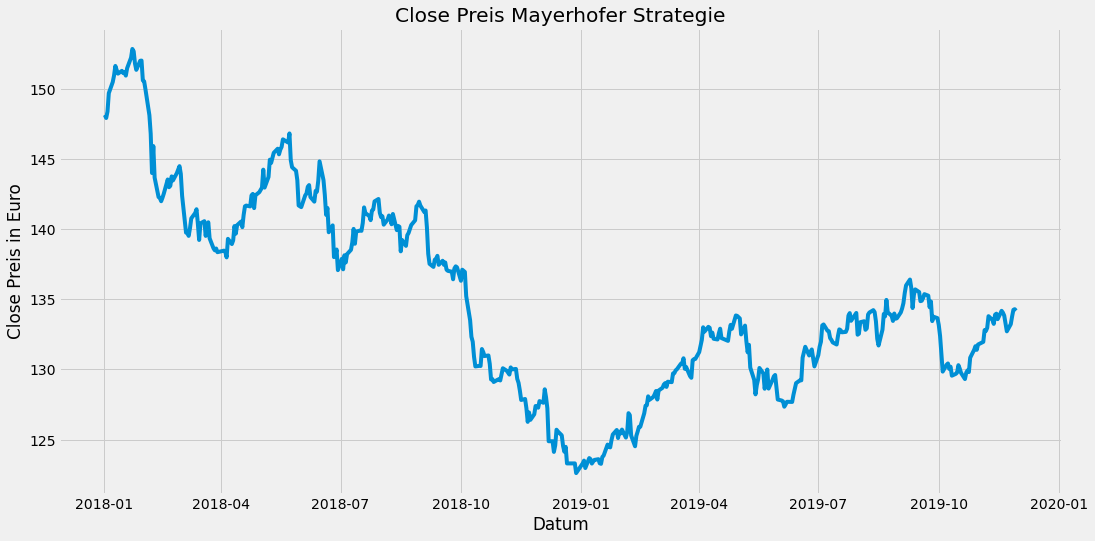

In [123]:
# Closing prize Mayerhofer
plt.figure(figsize=(16,8))
plt.title('Close Preis Mayerhofer Strategie')
plt.plot(df['Close'])
plt.xlabel('Datum')
plt.ylabel('Close Preis in Euro')
plt.show()

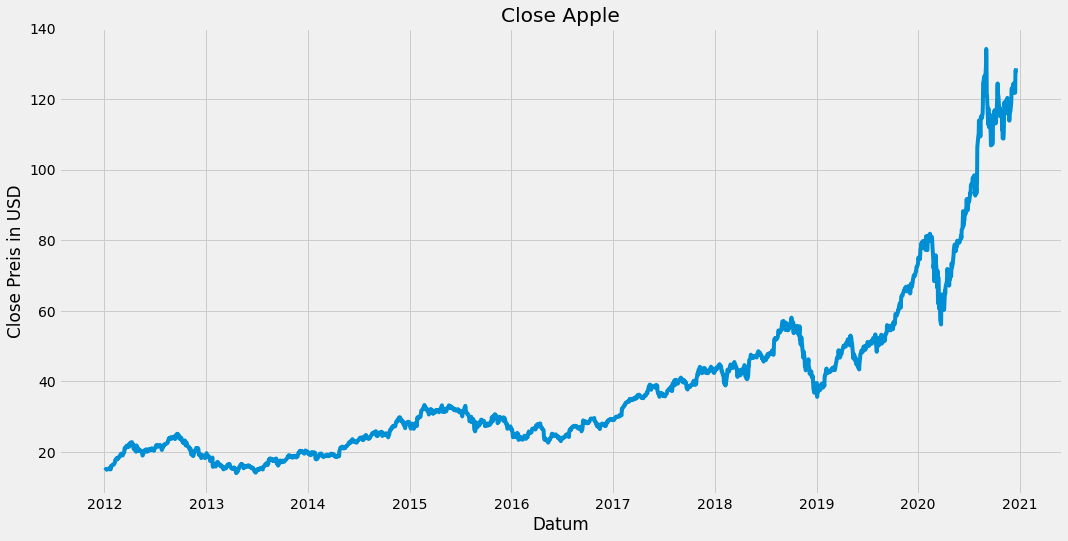

In [124]:
#closing prize Apple 
plt.figure(figsize=(16,8))
plt.title('Close Apple')
plt.plot(df_apple['Close'])
plt.xlabel('Datum')
plt.ylabel('Close Preis in USD')
plt.show()

In [125]:
# new dataframe only closing prices 
data_apple =df_apple.filter(['Close'])
data_may = df.filter(['Close'])

# convert into numpy array
dataset_apple= data_apple.values
dataset_may=data_may.values

# Get number of rows to train model with
# train with 80% of the data
training_data_apple_len = math.ceil(len(dataset_apple)*.8)
training_data_may_len = math.ceil(len(dataset_may)*0.8)

In [126]:
# should be 80% of the initial dataset which was 2256 rows
training_data_apple_len

1805

In [127]:
# should be 80% of the initial dataset
training_data_may_len

383

In [128]:
# then Scale the data

#Apple
scaler =MinMaxScaler(feature_range=(0,1))#create scaler object
scaled_data_apple = scaler.fit_transform(dataset_apple) #scales data based on 0, 1

#Mayerhofer
scaled_data_may = scaler.fit_transform(dataset_may)

In [129]:
# now all values between 0 and 1
scaled_data_may

array([[0.84414274],
       [0.83719398],
       [0.8524154 ],
       [0.8957641 ],
       [0.92190601],
       [0.93745866],
       [0.95996007],
       [0.950364  ],
       [0.94176061],
       [0.94837864],
       [0.94308401],
       [0.94506937],
       [0.93712743],
       [0.95466595],
       [0.97948395],
       [1.        ],
       [0.99437465],
       [0.96558542],
       [0.95069472],
       [0.97220396],
       [0.97253469],
       [0.92587672],
       [0.92356064],
       [0.90469872],
       [0.84381201],
       [0.80013209],
       [0.70747862],
       [0.77101264],
       [0.69655864],
       [0.65089336],
       [0.64857728],
       [0.64096606],
       [0.64923873],
       [0.6588353 ],
       [0.6922567 ],
       [0.67405673],
       [0.677366  ],
       [0.69953668],
       [0.68994061],
       [0.70747862],
       [0.71575129],
       [0.72369273],
       [0.70549276],
       [0.65354068],
       [0.56684329],
       [0.56684329],
       [0.55923207],
       [0.577

In [130]:
# make training dataset 
# create scaled training dataset for apple
train_data_apple = scaled_data_apple[0:training_data_apple_len, :] #from index 0 for the whole length and all columns

#split data into x_train and y_train data sets
x_train_ap = [] #independend training features
y_train_ap = [] #dependend training features

for i in range (60, len(train_data_apple)):
    x_train_ap.append(train_data_apple[i-60:i, 0]) #60 values from zero to 59
    y_train_ap.append(train_data_apple[i, 0]) # 61 value at position 60
    if i <= 60:
        print(x_train_ap) #contains past 60 values
        print(y_train_ap) #contains 61st value that we want the model to predict
        print()
    

[array([0.0061488 , 0.00680526, 0.00816869, 0.00946678, 0.00926776,
       0.00971629, 0.00951133, 0.00916676, 0.00869743, 0.01014998,
       0.01145994, 0.01105596, 0.00884298, 0.01095496, 0.00887566,
       0.01667305, 0.01607006, 0.01685722, 0.01855928, 0.01959001,
       0.01950387, 0.01918604, 0.02054056, 0.02181487, 0.02325851,
       0.0255903 , 0.03048855, 0.03056281, 0.03328967, 0.03532738,
       0.03182525, 0.03317382, 0.03314709, 0.03692846, 0.0363908 ,
       0.03738589, 0.0391741 , 0.0401692 , 0.04303567, 0.04512387,
       0.04572687, 0.04593778, 0.04236733, 0.04150589, 0.04163362,
       0.04499022, 0.04593482, 0.04796363, 0.05274602, 0.05912652,
       0.0579324 , 0.05793537, 0.06254846, 0.0639921 , 0.06296431,
       0.06202567, 0.06104839, 0.06429507, 0.06652291, 0.06745562])]
[0.06515055661523342]



In [131]:
##### Mayerhofer

# make training dataset 
# create scaled training dataset for apple
train_data_may = scaled_data_may[0:training_data_may_len, :] #from index 0 for the whole length and all columns

#split data into x_train and y_train data sets
x_train_ma = [] #independend training features
y_train_ma = [] #dependend training features

for i in range (60, len(train_data_may)):
    x_train_ma.append(train_data_may[i-60:i, 0]) #60 values from zero to 59
    y_train_ma.append(train_data_may[i, 0]) # 61 value at position 60
    if i <= 60:
        print(x_train_ma) #contains past 60 values
        print(y_train_ma) #contains 61st value that we want the model to predict
        print()

[array([0.84414274, 0.83719398, 0.8524154 , 0.8957641 , 0.92190601,
       0.93745866, 0.95996007, 0.950364  , 0.94176061, 0.94837864,
       0.94308401, 0.94506937, 0.93712743, 0.95466595, 0.97948395,
       1.        , 0.99437465, 0.96558542, 0.95069472, 0.97220396,
       0.97253469, 0.92587672, 0.92356064, 0.90469872, 0.84381201,
       0.80013209, 0.70747862, 0.77101264, 0.69655864, 0.65089336,
       0.64857728, 0.64096606, 0.64923873, 0.6588353 , 0.6922567 ,
       0.67405673, 0.677366  , 0.69953668, 0.68994061, 0.70747862,
       0.71575129, 0.72369273, 0.70549276, 0.65354068, 0.56684329,
       0.56684329, 0.55923207, 0.57710131, 0.60059541, 0.61317002,
       0.62210464, 0.58868275, 0.549636  , 0.58868275, 0.59397737,
       0.55923207, 0.58206471, 0.59133006, 0.55360672, 0.5297814 ])]
[0.5251487252196165]



In [132]:
# Convert x_train and y_train to numpy arrays to use later for training

#Apple
x_train_ap, y_train_ap =np.array(x_train_ap), np.array(y_train_ap)

#Mayerhofer
x_train_ma, y_train_ma=np.array(x_train_ma), np.array(y_train_ma)

In [133]:
# the reshape to give three dimensional sample but right now it's two dimensonal 
# as one can see with shape

print("shape of Mayerhofer beofore reshape:", x_train_ma.shape) 
# the printed numbers e.g. 391 & 60 would be used below but here it's easier to 
# just use the position (x_train_ap.shape[0])
x_train_ap = np.reshape(x_train_ap, (x_train_ap.shape[0], x_train_ap.shape[1], 1)) #rows, timestep, 1 feature (closing price)
x_train_ma = np.reshape(x_train_ma, (x_train_ma.shape[0], x_train_ma.shape[1], 1))

print("shape of Mayerhofer after reshaping:", x_train_ma.shape)

shape of Mayerhofer beofore reshape: (323, 60)
shape of Mayerhofer after reshaping: (323, 60, 1)


In [134]:
# building the model LSTM (long short term memory)

#APPLE
model_a = Sequential()
#input_shape because it is the first layer, using 50 nodes in the layer
model_a.add(LSTM(50, return_sequences=True, input_shape=(x_train_ap.shape[1], 1)))
model_a.add(LSTM(50, return_sequences=False))
model_a.add(Dense(25)) # normal dense layer with 25 nodes
model_a.add(Dense(1)) # last one out 1 output (following day)

#MAYERHOFER
model_m = Sequential()
#input_shape because it is the first layer, using 50 nodes in the layer
model_m.add(LSTM(50, return_sequences=True, input_shape=(x_train_ma.shape[1], 1)))
model_m.add(LSTM(50, return_sequences=False))
model_m.add(Dense(25)) # normal dense layer with 25 nodes
model_m.add(Dense(1)) # last one out 1 output (following day)


In [135]:
# compile the model
#add optimizer and loss fuunction here MSE
# Apple
model_a.compile(optimizer='adam', loss='mean_squared_error')

# Mayerhofer
model_m.compile(optimizer='adam', loss='mean_squared_error', metrics='accuracy')

### Train the models

In [154]:
# Apple
model_a.fit(x_train_ap, y_train_ap, batch_size=1, epochs=20)

Epoch 1/20
1745/1745 [==============================] - 21s 12ms/step - loss: 1.0898e-04
Epoch 2/20
1745/1745 [==============================] - 21s 12ms/step - loss: 9.9369e-05
Epoch 3/20
1745/1745 [==============================] - 22s 12ms/step - loss: 7.2343e-05
Epoch 4/20
1745/1745 [==============================] - 22s 12ms/step - loss: 5.9385e-05
Epoch 5/20
1745/1745 [==============================] - 22s 12ms/step - loss: 5.5290e-05
Epoch 6/20
1745/1745 [==============================] - 22s 12ms/step - loss: 6.1235e-05
Epoch 7/20
1745/1745 [==============================] - 22s 12ms/step - loss: 5.2807e-05
Epoch 8/20
1745/1745 [==============================] - 22s 12ms/step - loss: 4.6136e-05
Epoch 9/20
1745/1745 [==============================] - 22s 12ms/step - loss: 4.9050e-05
Epoch 10/20
1745/1745 [==============================] - 21s 12ms/step - loss: 4.9303e-05
Epoch 11/20
1745/1745 [==============================] - 21s 12ms/step - loss: 4.3134e-05
Epoch 12/20
1745/17

In [137]:
# Mayerhofer 
history_m = model_m.fit(x_train_ma, y_train_ma, batch_size=1, epochs=20)

Epoch 1/20
323/323 [==============================] - 4s 12ms/step - loss: 0.0057 - accuracy: 0.0031
Epoch 2/20
323/323 [==============================] - 4s 12ms/step - loss: 0.0033 - accuracy: 0.0031
Epoch 3/20
323/323 [==============================] - 4s 12ms/step - loss: 0.0026 - accuracy: 0.0031
Epoch 4/20
323/323 [==============================] - 4s 12ms/step - loss: 0.0019 - accuracy: 0.0031
Epoch 5/20
323/323 [==============================] - 4s 13ms/step - loss: 0.0015 - accuracy: 0.0031
Epoch 6/20
323/323 [==============================] - 4s 13ms/step - loss: 0.0014 - accuracy: 0.0031
Epoch 7/20
323/323 [==============================] - 4s 13ms/step - loss: 0.0011 - accuracy: 0.0031
Epoch 8/20
323/323 [==============================] - 4s 13ms/step - loss: 0.0010 - accuracy: 0.0031
Epoch 9/20
323/323 [==============================] - 4s 13ms/step - loss: 0.0010 - accuracy: 0.0031
Epoch 10/20
323/323 [==============================] - 4s 13ms/step - loss: 9.9897e-04 - ac

In [155]:
# create the testing dataset

# APPLE

#new array with the scaled values from index  from -60 till the end of the dataset with all columns
test_data_ap = scaled_data_apple[training_data_apple_len -60:, :]
#create data sets for testing x_test and y_test
x_test_ap=[]
y_test_ap= dataset_apple[training_data_apple_len:, :] #all the values we want to predict

# then make the x_test dataset with loop from all data after the 60 days we used and iterate
for i in range(60, len(test_data_ap)):
    x_test_ap.append(test_data_ap[i-60:i, 0])  
    
    
# MAYERHOFER

#new array with the scaled values from index  from -60 till the end of the dataset with all columns
test_data_ma = scaled_data_may[training_data_may_len -60:, :]
#create data sets for testing x_test and y_test
x_test_ma=[]
y_test_ma= dataset_may[training_data_may_len:, :] #all the values we want to predict

# then make the x_test dataset with loop from all data after the 60 days we used and iterate
for i in range(60, len(test_data_ma)):
    x_test_ma.append(test_data_ma[i-60:i, 0])  

In [156]:
x_test_ap = np.array(x_test_ap)
x_test_ma = np.array(x_test_ma)

np.shape(x_test_ap)

(451, 60)

In [157]:
# Reshape the data
# again making it 3 dimensional 
# number of rows x_test_ap.shape[0], number of timesteps/rows x_test_ap.shape[1], number of features (1)

# Apple
x_test_ap = np.reshape(x_test_ap, (x_test_ap.shape[0], x_test_ap.shape[1], 1))

# Mayerhofer
x_test_ma = np.reshape(x_test_ma, (x_test_ma.shape[0], x_test_ma.shape[1], 1))

In [158]:
# now get models predicted price values for x_test_
#Apple
predictions_ap = model_a.predict(x_test_ap)
# Mayerhofer
predictions_ma = model_m.predict(x_test_ma)

# then basically UNscale the values again to check with real values
predictions_ap = scaler.inverse_transform(predictions_ap)
predictions_ma = scaler.inverse_transform(predictions_ma)# we want those to be the same ones as y_test dataset


In [159]:
# evaluate the model by getting the RMSE that we measured the accuracy with
# sd of the residuals 

#Apple
rmse_ap=np.sqrt(np.mean(predictions_ap - y_test_ap)**2)
#Mayerhofer
rmse_ma=np.sqrt(np.mean(predictions_ma - y_test_ma)**2)

In [160]:
print("RMSE for Apple is: ", rmse_ap)
print("RMSE for Mayerhofer is:", rmse_ma)

RMSE for Apple is:  61.716096755406284
RMSE for Mayerhofer is: 0.27848398309004935


<ipython-input-161-1ac281c7e255>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_ap['Predictions'] = predictions_ap


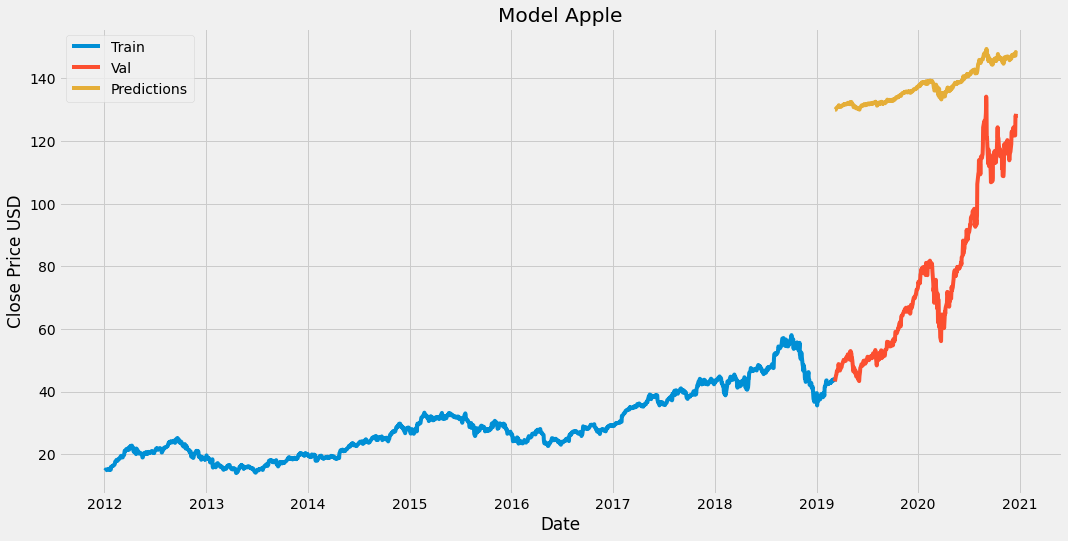

In [161]:
#APPLE

# plot the data
train_ap = data_apple[: training_data_apple_len]
valid_ap = data_apple[training_data_apple_len:]
valid_ap['Predictions'] = predictions_ap

#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model Apple')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.plot(train_ap['Close']) # dataset for the training data only Closing price
plt.plot(valid_ap[['Close', 'Predictions']]) #actual price and the predicted price
plt.legend(['Train', 'Val', 'Predictions'])
plt.show()

<ipython-input-162-c99f0d1e2d8d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_ma['Predictions'] = predictions_ma


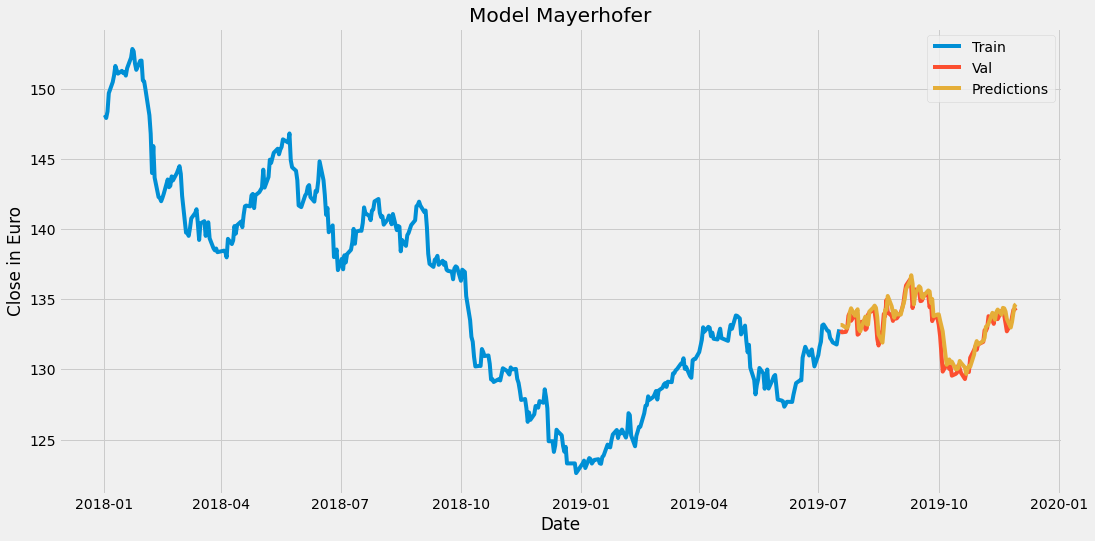

In [162]:
# plot the data
train_ma = data_may[: training_data_may_len]
valid_ma = data_may[training_data_may_len:]
valid_ma['Predictions'] = predictions_ma

#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model Mayerhofer')
plt.xlabel('Date')
plt.ylabel('Close in Euro')
plt.plot(train_ma['Close']) # dataset for the training data only Closing price
plt.plot(valid_ma[['Close', 'Predictions']]) #actual price and the predicted price
plt.legend(['Train', 'Val', 'Predictions'])
plt.show()

In [146]:
# valid closing price and predicted closing price
#Apple
print('\n Vergleich Vorhersage und tatsaechlicher Preis Apple: \n')
valid_ap.head()


 Vergleich Vorhersage und tatsaechlicher Preis Apple: 



,Close,Predictions
Date,,
2019-03-08,43.227501,129.124451
2019-03-11,44.724998,129.111176
2019-03-12,45.227501,129.131729
2019-03-13,45.427502,129.178299
2019-03-14,45.932499,129.236847


In [147]:
# valid closing price and predicted closing price

print('\n Vergleich Vorhersage und tatsaechlicher Preis Mayerhofer: \n')
valid_ma


 Vergleich Vorhersage und tatsaechlicher Preis Mayerhofer: 



,Close,Predictions
Date,,
2019-07-18,132.789993,133.163574
2019-07-19,132.639999,133.163406
2019-07-22,132.669998,132.977722
2019-07-23,132.899994,132.954758
2019-07-24,133.830002,133.164383
...,...,...
2019-11-25,133.220001,132.981964
2019-11-26,133.759995,133.405136
2019-11-27,134.240005,134.026184
